<a href="https://colab.research.google.com/github/arvind-22/colab/blob/main/ML_Python_IRIS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Python Project Template**

# 1. Prepare Problem
  ## a) Load libraries
  ## b) Load dataset

# 2. Summarize Data
  ## a) Descriptive statistics
  ## b) Data visualizations

# 3. Prepare Data
  ## a) Data Cleaning
  ## b) Feature Selection
  ## c) Data Transforms

# 4. Evaluate Algorithms
  ## a) Split-out validation dataset
  # b) Test options and evaluation metric
  # c) Spot Check Algorithms
  # d) Compare Algorithms

# 5. Improve Accuracy
  ## a) Algorithm Tuning
  ## b) Ensembles

# 6. Finalize Model
  ## a) Predictions on validation dataset
  ## b) Create standalone model on entire training dataset

In [2]:
# Load libraries
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [6]:
#Load Dataset
filename = 'iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(filename, names=names)

In [7]:
#Dimensions of Data
print(dataset.shape)

(150, 5)


In [8]:
#Head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [9]:
#Describe Dataset
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [10]:
#class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


**DATA VISUALIZATION**

a) Univariate Plots

b) Multivariate Plots

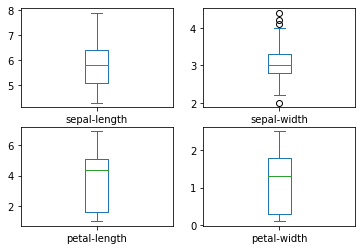

In [11]:
# Univariate Plots - Box and Whisker 
dataset.plot(kind ='box', subplots = True, layout=(2,2), sharex = False, sharey= False)
pyplot.show()

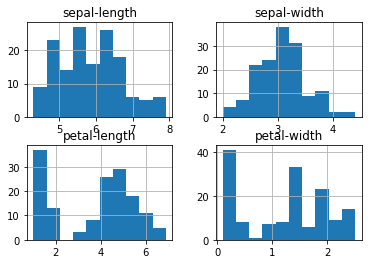

In [12]:
# histograms
dataset.hist()
pyplot.show()

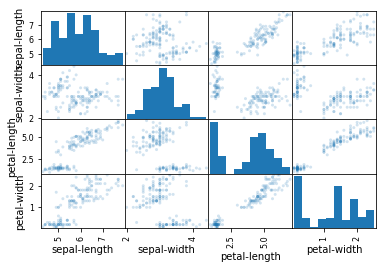

In [13]:
# Multivariate Plot - Scatter plot
import pandas as pd
pd.plotting.scatter_matrix(dataset, alpha=0.2)
pyplot.show()

#Evaluate some Algorithms
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross validation.
3. Build 5 dierent models to predict species from flower measurements
4. Select the best model.

In [14]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

We will use **10-fold cross validation** to estimate accuracy. This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits. We are using the metric of accuracy to evaluate models.

# Let's evaluate six different algorithms:
1. Logistic Regression (LR).
2. Linear Discriminant Analysis (LDA).
3. k-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).

In [20]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#scale the data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
#evaulate each model in turn
results = []
names =[]
for name, model in models:
  Kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_scaled, Y_train, cv=Kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.966667 (0.040825)
CART: 0.950000 (0.076376)
NB: 0.966667 (0.040825)
SVM: 0.975000 (0.038188)


We can see that it looks like KNN has the largest estimated accuracy score. We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model.

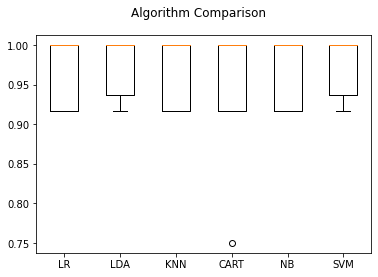

In [21]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [22]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



We can see that the accuracy is **0.9 or 90%**. The confusion matrix provides an indication of the three errors made.
